In [50]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/black-friday-sales-eda/train.csv


# Loading the Data

In [51]:
# Libraries needed for the notebook 
import warnings  
warnings.filterwarnings("ignore", category=RuntimeWarning)  # to remove warnings from our notebook 

import matplotlib.pyplot as plt 

Loading of the data 

In [52]:
df_sales = pd.read_csv("/kaggle/input/black-friday-sales-eda/train.csv") 

In [53]:
df_sales.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [54]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


We see that there are missing values 


In [55]:
# number of missing values
df_sales.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [56]:
# dropping missing values 
df_sales.dropna(inplace = True)

In [57]:
df_sales.shape

(166821, 12)

# Description of the Data

We can see that there are 12 features (columns) and 166821 observations (rows).
More about the columns from the Black Friday Sales Data Card:

* User_ID:    Unique identifier for the users 
* Product_ID:    Unique identifier for the product the user purchased
* Gender:    Sex of User
* Age:    Age in bins (['0-17', '46-50', '26-35', '51-55', '36-45', '18-25', '55+'])
* Occupation    Occupation (Masked)
* City_Category    Category of the City (A,B,C)
* Stay_In_Current_City_Years    Number of years stay in current city
* Marital_Status    Marital Status
* Product_Category_1    Product Category (Masked)
* Product_Category_2    Product may belongs to other category also (Masked)
* Product_Category_3    Product may belongs to other category also (Masked)
* Purchase    Purchase Amount (Target Variable)



In [58]:
for col in df_sales.columns: 
    if col != 'User_ID' and col != 'Product_ID' and col != 'Purchase':
      print(f" --- Unique values in {col} ---")
      print(df_sales[col].unique())


 --- Unique values in Gender ---
['F' 'M']
 --- Unique values in Age ---
['0-17' '46-50' '26-35' '51-55' '36-45' '18-25' '55+']
 --- Unique values in Occupation ---
[10  7 20  9  1 12 17  0  3 15  4 11  8 16 19  2 14 13  6  5 18]
 --- Unique values in City_Category ---
['A' 'B' 'C']
 --- Unique values in Stay_In_Current_City_Years ---
['2' '1' '4+' '0' '3']
 --- Unique values in Marital_Status ---
[0 1]
 --- Unique values in Product_Category_1 ---
[ 1  5  2  6  3  4  8 12 11 10 15 13]
 --- Unique values in Product_Category_2 ---
[ 6.  8.  2.  3. 14.  5.  4. 11. 15. 10.  9. 13. 12. 16.]
 --- Unique values in Product_Category_3 ---
[14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


In [59]:
df_sales.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,1.668210e+05,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000
mean,1.003037e+06,8.178886,0.402839,2.742766,6.896871,12.668243,11658.114980
std,1.732907e+03,6.487522,0.490470,2.573969,4.500288,4.125338,5082.287959
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001523e+06,2.000000,0.000000,1.000000,2.000000,9.000000,7869.000000
50%,1.003101e+06,7.000000,0.000000,1.000000,6.000000,14.000000,11756.000000
75%,1.004480e+06,14.000000,1.000000,4.000000,10.000000,16.000000,15626.000000
max,1.006040e+06,20.000000,1.000000,15.000000,16.000000,18.000000,23959.000000


# EDA

## Gender Distribution 

In [60]:
# getting total number of males 
males = (df_sales["Gender"] == 'M').sum().astype(float)
print(f"Total males :{males}")

# getting total number of females 
females = (df_sales["Gender"] == 'F').sum().astype(float)
print(f"Total females :{females}")

Total males :129227.0
Total females :37594.0


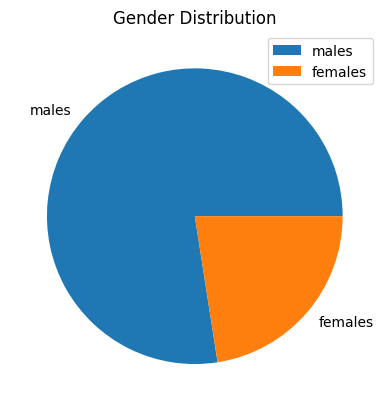

In [61]:
gender = np.array([males, females])
plt.pie(gender, labels = ['males','females'])
plt.title("Gender Distribution")
plt.legend()
plt.show()

We can see that in ABC Limited Company the customers are mostly males.

## Gender Distribution Purchase Power 

In [62]:
gender_purchase = df_sales.groupby(df_sales["Gender"])['Purchase'].sum().sort_values(ascending=False)
print(gender_purchase)

Gender
M    1528099293
F     416719106
Name: Purchase, dtype: int64


(array([0, 1]), [Text(0, 0, 'M'), Text(1, 0, 'F')])

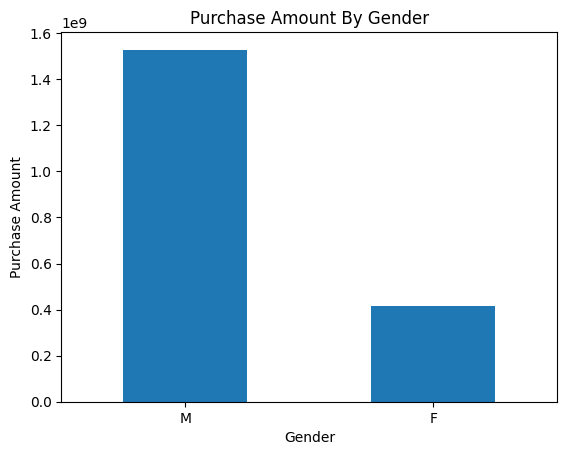

In [63]:
gender_purchase.plot(
    kind="bar",
    xlabel="Gender",
    ylabel="Purchase Amount",
    title="Purchase Amount By Gender"
);
plt.xticks(rotation=0)

Concluding that males outnumber females and their total purchases are significantly higher.

## Age Distribution 

In [64]:
age = df_sales.groupby(df_sales["Age"])["User_ID"].count().sort_values(ascending=False)
print(age)

Age
26-35    66942
36-45    33285
18-25    31316
46-50    13374
51-55    11166
55+       5865
0-17      4873
Name: User_ID, dtype: int64


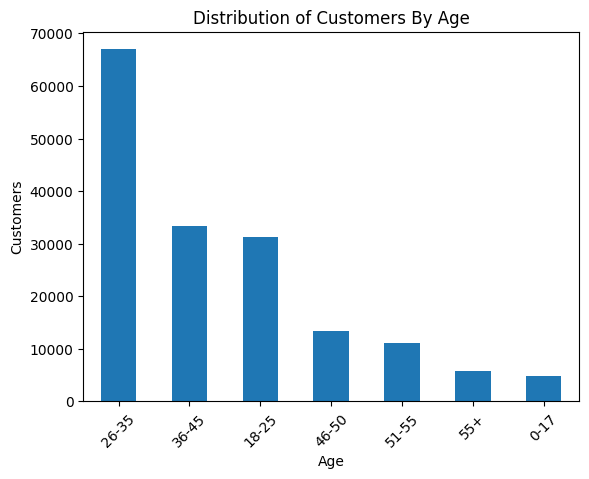

In [65]:
age.plot(
    kind="bar", 
    xlabel ="Age",
    ylabel ="Customers",
    title ="Distribution of Customers By Age"
)
plt.xticks(rotation=45);


## Age Distribution Purchase Power 

In [66]:
age_purchase = df_sales.groupby(df_sales["Age"])["Purchase"].sum().sort_values(ascending=False)
print(age_purchase)

Age
26-35    777347110
36-45    390411894
18-25    362666166
46-50    155994042
51-55    134388441
55+       69567842
0-17      54442904
Name: Purchase, dtype: int64


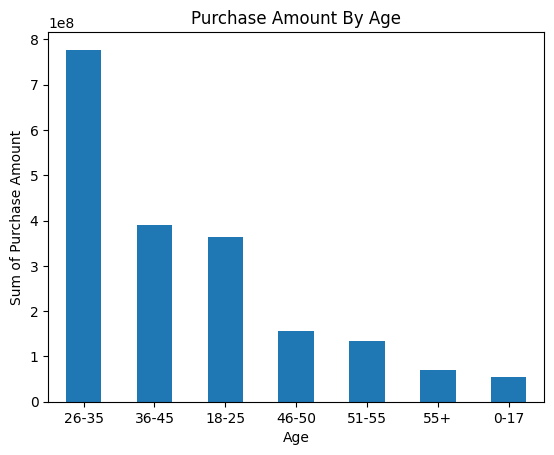

In [67]:
age_purchase.plot(
    kind="bar", 
    xlabel ="Age",
    ylabel ="Sum of Purchase Amount",
    title ="Purchase Amount By Age"
)
plt.xticks(rotation=0);

We see that the majority age group is 26-35, and they also have the largest total purchase amount.

## Occupation

In [68]:
occupation_purchase = df_sales.groupby(df_sales["Occupation"])["Purchase"].sum().sort_values(ascending=False)
print(occupation_purchase)


Occupation
4     259061934
0     240680898
7     211461594
17    170827574
1     151552394
12    126963657
20    103025101
14    100516186
16     87152898
2      85376522
6      68524749
3      58078326
10     48513523
15     47923272
5      45906022
11     38241744
19     26592051
13     24167287
18     23422830
9      20397430
8       6432407
Name: Purchase, dtype: int64


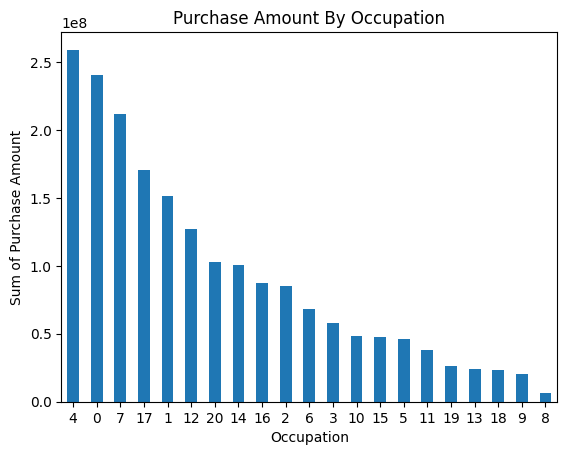

In [69]:
occupation_purchase.plot(
  kind="bar",
  xlabel ="Occupation",
  ylabel ="Sum of Purchase Amount",
  title ="Purchase Amount By Occupation"
)
plt.xticks(rotation=0);

The occupation that has the highest sum of Purchase amount is 4.

## Location

In [70]:
df_sales.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [71]:
location_purchase = df_sales.groupby(df_sales["City_Category"])["Purchase"].sum().sort_values(ascending=False)
print(location_purchase)

City_Category
B    795469852
C    684341195
A    465007352
Name: Purchase, dtype: int64


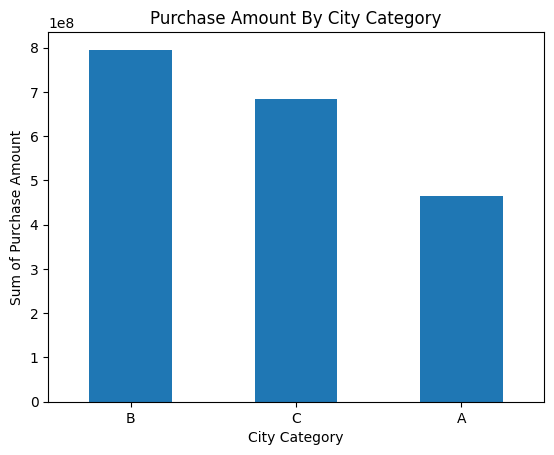

In [72]:
location_purchase.plot(
    kind = "bar",
    xlabel="City Category",
    ylabel="Sum of Purchase Amount",
    title="Purchase Amount By City Category"
    
)
plt.xticks(rotation=0);


City Category B has the highest total Purchase Amount.

In [73]:
# City Category pie chart 
city = df_sales.groupby(df_sales["City_Category"])["User_ID"].count()
print(city)

City_Category
A    41519
B    69243
C    56059
Name: User_ID, dtype: int64


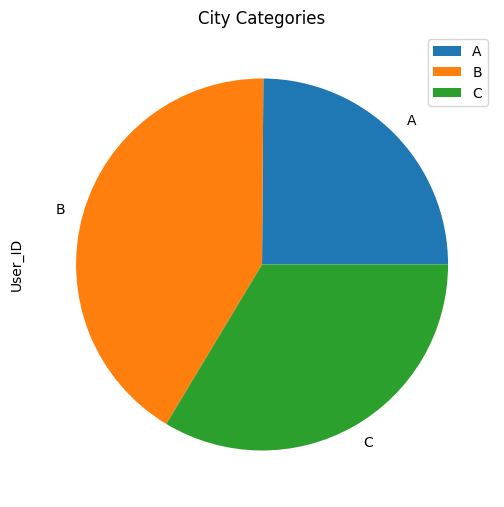

In [74]:
city.plot(
    kind="pie",
    title="City Categories",
    figsize=(6,8)
    
)
plt.legend();

## Stay in current city in years.


In [75]:
years_purchase = df_sales.groupby(df_sales['Stay_In_Current_City_Years'])['Purchase'].sum().sort_values(ascending=False)
print(years_purchase)

Stay_In_Current_City_Years
1     679214150
2     371032941
3     340393757
4+    296616159
0     257561392
Name: Purchase, dtype: int64


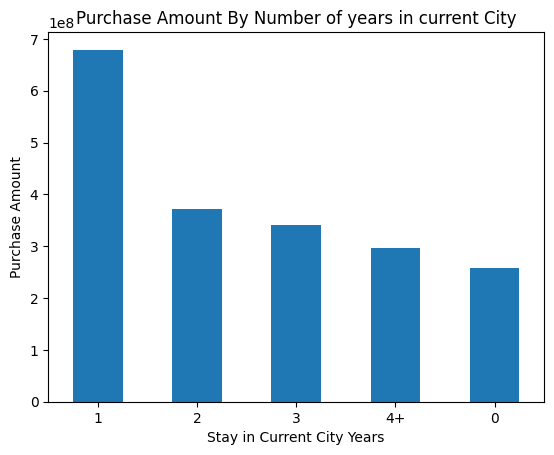

In [77]:
years_purchase.plot(
    kind="bar",
    title = "Purchase Amount By Number of years in current City",
    ylabel = "Purchase Amount", 
    xlabel = "Stay in Current City Years"
)
plt.xticks(rotation=0);

The first year users stay in a certain country, they purchase more.

## Marital Status

In [78]:
marital = df_sales.groupby(df_sales['Marital_Status'])['User_ID'].sum().sort_values(ascending=False)
print(marital)

Marital_Status
0    99918904720
1    67408738439
Name: User_ID, dtype: int64


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

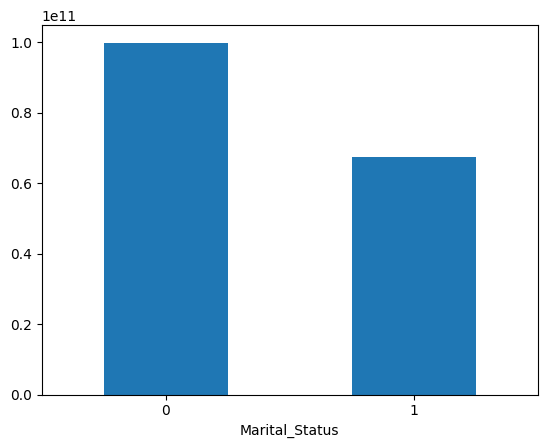

In [79]:
marital.plot(kind="bar")
plt.xticks(rotation=0)

## Gender and Marital status

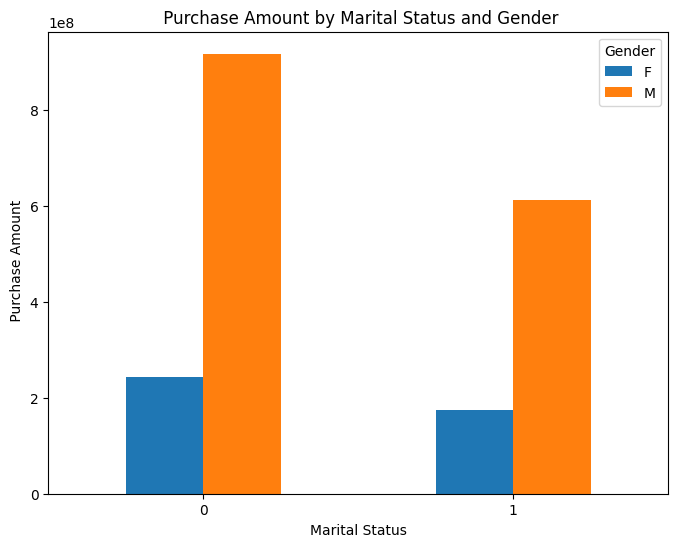

In [80]:
grouped = df_sales.groupby(['Marital_Status', 'Gender'])['Purchase'].sum().unstack()


grouped.plot(kind='bar', figsize=(8, 6))
plt.title(' Purchase Amount by Marital Status and Gender')
plt.xlabel('Marital Status')
plt.ylabel(' Purchase Amount')
plt.legend(title='Gender')
plt.xticks(rotation=0)

plt.show()


Majority of the purchaes are generated by the unmarried man

## Checking for Outliers

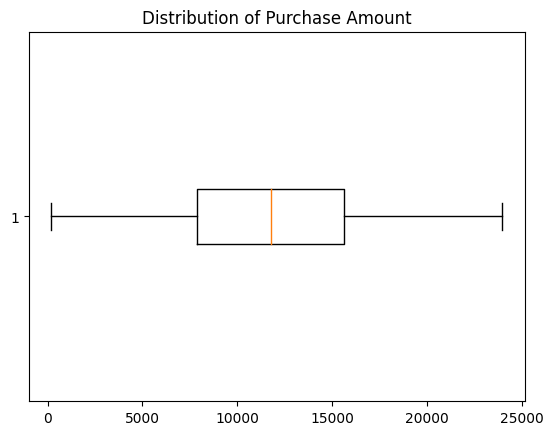

In [81]:
plt.boxplot(df_sales["Purchase"], vert=False)
plt.title("Distribution of Purchase Amount");

We can see that our data has no outliers.